# Textmining

---

Group name: O

---


By performing textmining we can analyse data and understand correlations.

In [1]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Import data

In [2]:
import pandas as pd

# Import data from task 1 "webscraping"
df = pd.read_csv("https://raw.githubusercontent.com/FabioRaab/bigData-HW1/main/notebooks/articles.csv")

# drop some columns to focus on data that is important for this task only
df.drop(columns=["Subtitle h3"], inplace=True)

df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 ElectionA Blue Nevada Means Democrats Wil...


## Data corrections

In [3]:
# adjust type and output in lower case letters only

df['Article-Text'] = df['Article-Text'].astype(str).str.lower()

df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 electiona blue nevada means democrats wil...


We did not scrape the posting time of the article which is why I will not be using function pd.to_datetime.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1 non-null      int64 
 1   Author        1 non-null      object
 2   Title         1 non-null      object
 3   Subtitle h2   1 non-null      object
 4   Article-Text  1 non-null      object
dtypes: int64(1), object(4)
memory usage: 168.0+ bytes


## Text mining data preparation

In [5]:
from nltk.tokenize import RegexpTokenizer

In [6]:
regexp= RegexpTokenizer('\w+')
df['text_token']=df['Article-Text'].apply(regexp.tokenize)

In [7]:
df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text,text_token
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 electiona blue nevada means democrats wil...,"[2022, electiona, blue, nevada, means, democra..."


## Stopwords

Stopwords are words that are not significantly important to the data set which is why we want to make sure to delete the stop words prior to working with the data. Example's are "me" or "won't".

In [8]:
import nltk

# download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eciiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
from nltk.corpus import stopwords

In [10]:
# all stopwords

stopwords = nltk.corpus.stopwords.words("english")

stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
# add "that" to stopwords list

my_stopwords = ['that']
stopwords.extend(my_stopwords)

In [12]:
# Delete all stopwords in `text_token` and create a new column called `text_token_s` (for "text token without stopwords"). 

df['text_token_s'] = df['text_token'].apply(lambda x: [i for i in x if i not in stopwords])

df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text,text_token,text_token_s
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 electiona blue nevada means democrats wil...,"[2022, electiona, blue, nevada, means, democra...","[2022, electiona, blue, nevada, means, democra..."


## Transform data and remove infrequent words

In [13]:
# transform the text tokens to a simple string because the following steps (like lemmatization) can't handle tokens
# remove words which occur less then three times (because such infrequent words usually don't have much value for our analysis)

df['text_stopwordsinfrequent'] = df['text_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>3]))

df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text,text_token,text_token_s,text_stopwordsinfrequent
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 electiona blue nevada means democrats wil...,"[2022, electiona, blue, nevada, means, democra...","[2022, electiona, blue, nevada, means, democra...",2022 electiona blue nevada means democrats kee...


## Lemmatization

In [14]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eciiy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\eciiy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
wordnet_lem = WordNetLemmatizer()

In [16]:
# create a column called text_stopwordsinfrequentlem (lem stands for lemmatization) and apply the function .lemmatize

df['text_stopwordsinfrequentlem'] = df['text_stopwordsinfrequent'].apply(wordnet_lem.lemmatize)

In [17]:
check_difference = (df['text_stopwordsinfrequentlem'] == df['text_stopwordsinfrequent'])

check_difference.value_counts()

True    1
dtype: int64

In [18]:
df.to_csv("article.csv", index=None)

## Data Visualization

In [19]:
all_words = ' '.join([i for i in df['text_stopwordsinfrequentlem']])

all_words

'2022 electiona blue nevada means democrats keep control senateby geoffrey skelley 2022 photo illustration fivethirtyeight getty imagesfor democrats silver state gold news reported democratic catherine cortez masto projected reelection nevada projection confirms democrats retain least seats senate vice president kamala harris breaking vote guarantees democrats slim majority congress upper chamber nevada news comes heels projection arizona senate race friday night became clear democratic mark kelly would reelection grand canyon state know partisan makeup next senate lone exception georgia runoff alaska projected contenders results unusual midterm election coming 2022 election president party lost senate seats last midterm elections average loss roughly five seats democrats suffer losses senate picking open seat pennsylvania previously held republican could achieve gain seat democratic raphael warnock defeats republican herschel walker georgia runoff democrats managed despite president b

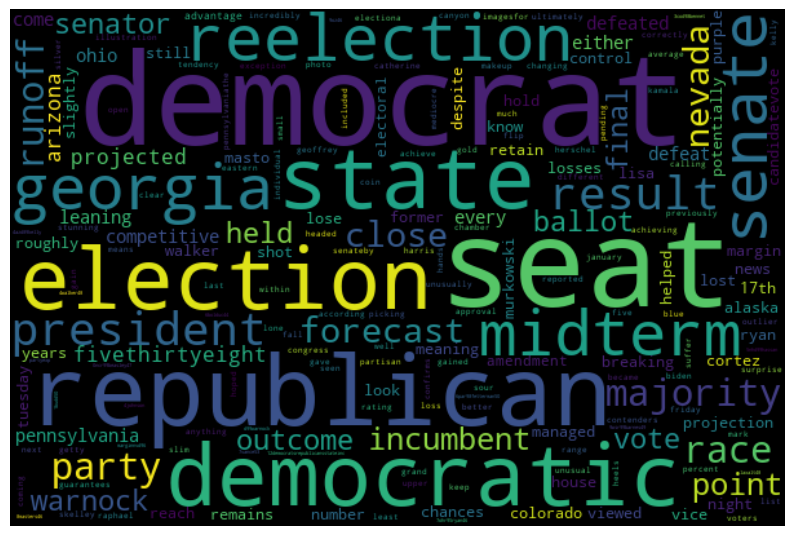

In [20]:
# Create word cloud no. 1

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

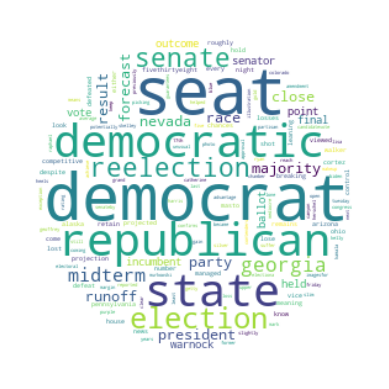

In [21]:
# Create word cloud no. 2

import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

## Frequency distributions

In [22]:
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eciiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
words_tokens = nltk.word_tokenize(all_words)

fd = FreqDist(words_tokens)

fd

FreqDist({'democrats': 22, 'seats': 15, 'democratic': 9, 'reelection': 8, 'senate': 8, 'georgia': 8, 'republican': 8, 'state': 7, 'president': 7, 'midterm': 7, ...})

## Most common words

In [24]:
# 5 most common words

top_5 = fd.most_common(n=5)

top_5

[('democrats', 22),
 ('seats', 15),
 ('democratic', 9),
 ('reelection', 8),
 ('senate', 8)]

In [25]:
fd.tabulate(5)

 democrats      seats democratic reelection     senate 
        22         15          9          8          8 


## Plot common words

In [26]:
# 10 most common words

top_10 = fd.most_common(10)

top_10

[('democrats', 22),
 ('seats', 15),
 ('democratic', 9),
 ('reelection', 8),
 ('senate', 8),
 ('georgia', 8),
 ('republican', 8),
 ('state', 7),
 ('president', 7),
 ('midterm', 7)]

In [27]:
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
democratic,9
democrats,22
georgia,8
midterm,7
president,7
reelection,8
republican,8
seats,15
senate,8
state,7


In [28]:
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,democratic,9
1,democrats,22
2,georgia,8
3,midterm,7
4,president,7
5,reelection,8
6,republican,8
7,seats,15
8,senate,8
9,state,7


In [29]:
import altair as alt

In [30]:
alt.Chart(df_dist).mark_bar().encode(
    x=alt.X('value'),
    y=alt.Y('index',
        sort='-x')
)

alt.Chart(...)

In [31]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

## Search specific words

In [32]:
# Search for frequency of specific words

fd["senate"]

8

In [33]:
fd["state"]

7

In [34]:
fd["georgia"]

8